In [1]:
#read dataset
import pandas as pd

dataset = '/content/drive/MyDrive/GenzeonMLPrep/04-07-2023/Tweets.csv'
df= pd.read_csv(dataset)

In [2]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [6]:
df = df.drop(['sentiment'], axis=1)

In [7]:
df.head()

,textID,text,selected_text,encoded_sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0


In [8]:
df = df.drop(['text'], axis=1)
df.head()

,textID,selected_text,encoded_sentiment
0,cb774db0d1,"I`d have responded, if I were going",1
1,549e992a42,Sooo SAD,0
2,088c60f138,bullying me,0
3,9642c003ef,leave me alone,0
4,358bd9e861,"Sons of ****,",0


In [9]:
df = df.drop(['textID'], axis=1)
df.head()

,selected_text,encoded_sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


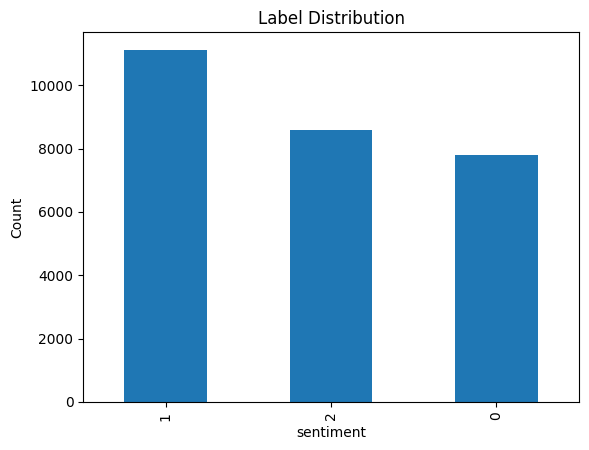

In [10]:
import matplotlib.pyplot as plt

label_counts = df['encoded_sentiment'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title('Label Distribution')

# Display the plot
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['selected_text'], df['encoded_sentiment'], test_size=0.2, random_state=42)

In [12]:
import nltk
nltk.download(['punkt','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
from nltk.corpus.reader import wordnet
def get_wordnet_pos_tag(word):

  tag=nltk.pos_tag([word])[0][1][0]
  tag_dict={
      "J":wordnet.ADJ,
      "R":wordnet.ADV,
      "N":wordnet.NOUN,
      "V":wordnet.VERB
  }

  return tag_dict.get(tag,wordnet.NOUN) #default tag - POS tag - when the word not classified as any predefined POS


def tokenize_lemma(text): #user defined / custom tokenizer - with lemma power - POS

  tokens=nltk.word_tokenize(text)
  lemm=WordNetLemmatizer()
  clean_tokens=[]

  for word in tokens:
    lemm.lemmatize(word,get_wordnet_pos_tag(word))
    clean_tokens.append( lemm.lemmatize(word,get_wordnet_pos_tag(word)))

  return clean_tokens

tokenize_lemma("My Gradma is very caring. The striped bats are hanging on their feet")

['My',
 'Gradma',
 'be',
 'very',
 'care',
 '.',
 'The',
 'strip',
 'bat',
 'be',
 'hang',
 'on',
 'their',
 'foot']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(tokenizer=tokenize_lemma) #removes punctuations, lowercases, tokeniztion, freqmatrix
#access the tokenization and introduce lemma in that - hardcore explicitly

#generates frquency table for tokens of all docs + power of lemmatization

In [17]:
x_train_count=vect.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Count Vectorizer + TFIDFTransformer = TFIDFVectorizer**

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #Highlight the important words in every document

In [19]:
#train our model - preprocessing text into vectors
x_train_count=vect.fit_transform(X_train)
x_train_tfidf=tfidf.fit_transform(x_train_count)

In [20]:
#train our model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [21]:
#test the model
x_test_tfidf=tfidf.transform(vect.transform(X_test))
ypred=clf.predict(x_test_tfidf)

In [22]:
#Accuracies
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.7433145352010188


In [23]:
#Overall accuracy
clf.score(tfidf.transform(vect.transform(df['selected_text'])),df['encoded_sentiment'])

0.9465468306527909

In [24]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [26]:
import gradio as gr
# Load your trained model and vectorizer
# Define the function to make predictions

def predict_comment(comment):

    transformed_comment = vect.transform([comment])

    prediction = clf.predict(transformed_comment)[0]
    print(prediction)
    if int(prediction) == 0:
      return "Negative Sentiment"
    elif int(prediction)==1:
      return "Neutral Sentiment"
    else:
      return "Positive"
# Create the Gradio interface
iface = gr.Interface(

    fn=predict_comment,

    inputs=gr.inputs.Textbox(placeholder="Enter a comment"),

    outputs="text"

)
# Launch the interface

iface.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
